<!-- =========================
Aeroelasticity Project — Notebook Statement (HTML)
Paste this at the top of a Jupyter Notebook cell (Markdown or HTML display).
========================= -->

<div style="
font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Arial, sans-serif;
line-height: 1.45;
color: #111;
max-width: 980px;
margin: 0 auto;
">

<!-- Title Card -->
<div style="
border: 1px solid #e5e7eb;
border-radius: 14px;
padding: 18px 18px 14px 18px;
background: linear-gradient(180deg, #f8fafc 0%, #ffffff 70%);
box-shadow: 0 1px 8px rgba(0,0,0,0.06);
">
<div style="display:flex; gap:14px; align-items:flex-start; flex-wrap:wrap;">
<div style="
width: 44px; height: 44px;
border-radius: 12px;
display:flex; align-items:center; justify-content:center;
background:#111827; color:#fff; font-weight:700;
flex: 0 0 auto;
">
AE
</div>

<div style="flex: 1 1 520px;">
<h1 style="margin:0; font-size: 22px; letter-spacing: 0.2px;">
Trabalho de Aeroelasticidade — Enunciado
</h1>

<div style="margin-top:6px; font-size: 13.5px; color:#374151;">
Implementação em <b>Python</b> (Jupyter Notebook) de um fluxo completo:
<b>MEF</b> (placa plana) + <b>modelo aerodinâmico</b> + <b>acoplamento aeroelástico</b>,
com <b>verificação</b> e <b>atualização</b> baseada em testes experimentais (laboratório e túnel de vento).
</div>

<div style="margin-top:10px; display:flex; gap:10px; flex-wrap:wrap;">
<span style="
font-size:12px; padding:4px 10px; border-radius:999px;
border:1px solid #e5e7eb; background:#fff;
">
📌 Notebook dividido em capítulos
</span>
<span style="
font-size:12px; padding:4px 10px; border-radius:999px;
border:1px solid #e5e7eb; background:#fff;
">
✅ Sumário no início
</span>
<span style="
font-size:12px; padding:4px 10px; border-radius:999px;
border:1px solid #e5e7eb; background:#fff;
">
🧪 Atualização com dados reais
</span>
</div>
</div>
</div>
</div>

<!-- Geometry Box -->
<div style="margin-top:14px; border-left: 5px solid #111827; padding: 10px 14px; background:#f9fafb; border-radius: 10px;">
<h2 style="margin: 0 0 6px 0; font-size: 16px;">Geometria da placa (trapezoidal)</h2>
<ul style="margin: 0; padding-left: 18px; font-size: 14px;">
<li><b>c<sub>root</sub> (C_corda):</b> 40 cm</li>
<li><b>c<sub>tip</sub> (c_tip):</b> 25 cm</li>
<li><b>b:</b> 5 cm</li>
<li><b>Referência angular:</b> ângulo 0° no bordo de fuga</li>
</ul>
<div style="margin-top:8px; font-size: 12.5px; color:#4b5563;">
Observação: todas as grandezas devem ser convertidas e usadas de forma consistente em unidades SI (m, kg, s).
</div>
</div>

<!-- Table of Contents -->
<div id="sumario" style="margin-top:18px; padding: 14px; border:1px dashed #cbd5e1; border-radius: 12px; background:#ffffff;">
<h2 style="margin:0 0 10px 0; font-size: 16px;">Sumário (capítulos do notebook)</h2>
<ol style="margin:0; padding-left: 18px; font-size: 14px;">
<li><a href="#cap1" style="color:#1f2937; text-decoration:none;">Capítulo 1 — Objetivo e escopo</a></li>
<li><a href="#cap2" style="color:#1f2937; text-decoration:none;">Capítulo 2 — Modelo por Elementos Finitos (MEF) para placa plana</a></li>
<li><a href="#cap3" style="color:#1f2937; text-decoration:none;">Capítulo 3 — Modelo aerodinâmico</a></li>
<li><a href="#cap4" style="color:#1f2937; text-decoration:none;">Capítulo 4 — Acoplamento aeroelástico (aero + MEF)</a></li>
<li><a href="#cap5" style="color:#1f2937; text-decoration:none;">Capítulo 5 — Verificação e atualização do MEF (ensaios em laboratório)</a></li>
<li><a href="#cap6" style="color:#1f2937; text-decoration:none;">Capítulo 6 — Verificação e atualização do modelo aerodinâmico (túnel de vento)</a></li>
<li><a href="#cap7" style="color:#1f2937; text-decoration:none;">Capítulo 7 — Resultados finais, conclusões e próximos passos</a></li>
</ol>
</div>


<!-- Chapters -->
<hr style="margin: 18px 0; border: none; border-top: 1px solid #e5e7eb;"/>

<div id="cap1" style="padding: 6px 2px;">
<h2 style="margin:0 0 6px 0; font-size: 18px;">Capítulo 1 — Objetivo e escopo</h2>

<p style="margin:0 0 10px 0; font-size: 14px; color:#111827;">
Este trabalho tem como objetivo desenvolver um modelo aeroelástico completo para uma 
<b>placa plana trapezoidal</b> que já existe fisicamente no laboratório de Aeroelasticidade da UFU. 
Essa placa será posteriormente ensaiada em laboratório e testada em túnel de vento, permitindo 
comparações diretas entre resultados numéricos e experimentais.
</p>

<p style="margin:0 0 10px 0; font-size: 14px; color:#111827;">
A primeira etapa consiste na construção de um <b>modelo estrutural por Elementos Finitos (MEF)</b>, 
que pode ser implementado na linguagem de programação de nossa escolha (como Python). 
Nesse modelo, representaremos a geometria real da placa, suas propriedades materiais e 
condições de contorno, com o objetivo de determinar suas características dinâmicas, 
especialmente <b>frequências naturais e modos de vibração</b>.
</p>

<p style="margin:0 0 10px 0; font-size: 14px; color:#111827;">
Com o modelo estrutural estabelecido, será realizada uma <b>análise modal</b> para identificar 
os modos próprios de vibrar da placa. Posteriormente, esses resultados numéricos serão 
comparados com ensaios experimentais de laboratório, nos quais os modos de vibração reais 
serão medidos. Essa comparação permitirá ajustar parâmetros do modelo estrutural 
(rigidez, massa, amortecimento, condições de contorno), realizando assim uma 
<b>atualização do modelo de elementos finitos</b>.
</p>

<p style="margin:0 0 10px 0; font-size: 14px; color:#111827;">
Em paralelo, será desenvolvido um <b>modelo aerodinâmico</b> adequado para representar 
as cargas aerodinâmicas atuantes sobre a placa quando submetida ao escoamento de ar. 
Esse modelo será então <b>acoplado ao modelo estrutural</b>, formando o sistema aeroelástico 
completo, capaz de prever o comportamento da placa sob ação combinada de efeitos estruturais 
e aerodinâmicos.
</p>

<p style="margin:0; font-size: 14px; color:#111827;">
Após o acoplamento, os resultados aeroelásticos obtidos numericamente serão comparados 
com dados experimentais provenientes de testes em <b>túnel de vento</b>. A partir dessa 
comparação, será possível ajustar também o modelo aerodinâmico, buscando maior aderência 
entre simulação e experimento. Dessa forma, o trabalho segue uma metodologia iterativa: 
modelagem numérica → validação experimental → atualização de modelo, garantindo 
consistência física e confiabilidade preditiva.
</p>

</div>


<div id="cap2" style="padding: 6px 2px; margin-top: 10px;">
<h2 style="margin:0 0 6px 0; font-size: 18px;">Capítulo 2 — Modelo por Elementos Finitos (MEF) para placa plana</h2>
<ul style="margin:0; padding-left: 18px; font-size: 14px;">
<li>Definir a geometria trapezoidal e a malha de elementos.</li>
<li>Escolher a formulação de placa apropriada (ex.: Kirchhoff-Love ou Mindlin-Reissner, conforme hipótese adotada).</li>
<li>Montar matrizes estruturais (rigidez, massa e, se aplicável, amortecimento).</li>
<li>Definir condições de contorno e validações numéricas básicas (sanity checks).</li>
</ul>
</div>


In [7]:
# ============================================================
# Célula 1 — Imports
# ============================================================
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [8]:
# ============================================================
# Célula 2 — Geometria: corda linear (asa trapezoidal)
# ============================================================

def chord_linear(y, b, c_root, c_tip):
    return c_root + (c_tip - c_root) * (y / b)

In [9]:
# ============================================================
# Célula 3 — Gerador: QUADS no interior + (RETÂNGULO + TRIÂNGULO) no bordo inclinado
#
# Ideia:
# - Usamos um passo base h = c_tip / nx_tip
# - Em cada faixa (y_j -> y_{j+1}), preenchemos:
#     1) quads completos até x <= min(c_j, c_{j+1})
#     2) se sobrar um pedacinho (<h) até min(c_j, c_{j+1}), criamos 1 quad "parcial"
#     3) se uma das cordas for maior que a outra, o resto vira 1 triângulo (wedge)
#
# Isso remove a restrição |ΔNx| <= 1 e funciona para qualquer malha (ny, nx_tip).
# ============================================================

def generate_mesh_quads_plus_edge_split(
    b,
    c_root,
    c_tip,
    nx_tip,   # define h = c_tip/nx_tip
    ny        # divisões no span
):
    """
    Gera malha para o domínio 0 <= x <= c(y), 0 <= y <= b, com c(y) linear.

    Para cada faixa (y0->y1), o polígono é:
        (0,y0) -> (c0,y0) -> (c1,y1) -> (0,y1)

    Decomposição:
      - QUADS regulares de largura h até x <= min(c0,c1)
      - 1 QUAD parcial se min(c0,c1) não cair exatamente em múltiplo de h
      - 1 TRIÂNGULO para o "wedge" quando c0 != c1

    Retorna:
      nodes: array (N,3) com (x,y,z)
      quads: lista de [n1,n2,n3,n4]
      tris : lista de [n1,n2,n3]
      meta : dicionário com h, y_nodes
    """
    if b <= 0 or c_root <= 0 or c_tip <= 0:
        raise ValueError("b, c_root, c_tip devem ser > 0.")
    if nx_tip <= 0 or ny <= 0:
        raise ValueError("nx_tip e ny devem ser > 0.")

    h = c_tip / nx_tip
    y_nodes = np.linspace(0.0, b, ny + 1)

    # ---------- nós (por coordenada, para suportar borda inclinada) ----------
    nodes = []
    node_id = {}

    def add_node(x, y, z=0.0):
        # chave arredondada p/ evitar duplicatas por erro numérico
        key = (round(float(x), 12), round(float(y), 12), round(float(z), 12))
        if key in node_id:
            return node_id[key]
        idx = len(nodes)
        nodes.append([x, y, z])
        node_id[key] = idx
        return idx

    # ---------- elementos ----------
    quads = []
    tris = []

    for j in range(ny):
        y0 = y_nodes[j]
        y1 = y_nodes[j + 1]

        c0 = chord_linear(y0, b, c_root, c_tip)
        c1 = chord_linear(y1, b, c_root, c_tip)

        minc = min(c0, c1)
        maxc = max(c0, c1)

        # número de quads completos (largura h) que cabem em minc
        n_full = int(np.floor(minc / h + 1e-12))
        x_full_end = n_full * h

        # 1) quads completos
        for i in range(n_full):
            xa = i * h
            xb = (i + 1) * h
            n1 = add_node(xa, y0)
            n2 = add_node(xb, y0)
            n3 = add_node(xb, y1)
            n4 = add_node(xa, y1)
            quads.append([n1, n2, n3, n4])

        # 2) quad parcial até minc (se necessário)
        if (minc - x_full_end) > 1e-10:
            xa = x_full_end
            xb = minc
            n1 = add_node(xa, y0)
            n2 = add_node(xb, y0)
            n3 = add_node(xb, y1)
            n4 = add_node(xa, y1)
            quads.append([n1, n2, n3, n4])

        # 3) triângulo do wedge (se existir)
        if (maxc - minc) > 1e-10:
            if c0 > c1:
                # corda diminui com y: triângulo fica "embaixo" (linha y0 é maior)
                # vértices: (minc,y0) -> (c0,y0) -> (minc,y1)  (onde minc=c1)
                t = [add_node(minc, y0), add_node(c0, y0), add_node(minc, y1)]
                tris.append(t)
            else:
                # corda aumenta com y: triângulo fica "em cima" (linha y1 é maior)
                # vértices: (minc,y0) -> (minc,y1) -> (c1,y1)  (onde minc=c0)
                t = [add_node(minc, y0), add_node(minc, y1), add_node(c1, y1)]
                tris.append(t)

    nodes = np.array(nodes, dtype=float)
    meta = {"h": h, "y_nodes": y_nodes}
    return nodes, quads, tris, meta


In [10]:
# ============================================================
# Célula 4 — Plot 2D (pra validar se ficou igual ao seu desenho)
# ============================================================

def plot_mesh_2d(nodes, quads, tris, title="Malha 2D (eixos invertidos)"):
    plt.figure(figsize=(9,4))

    # quads
    for q in quads:
        P = nodes[q][:, :2]
        P = np.vstack([P, P[0]])
        plt.plot(P[:,1], P[:,0], linewidth=1)  # <<< y vira x, x vira y

    # tris
    for t in tris:
        P = nodes[t][:, :2]
        P = np.vstack([P, P[0]])
        plt.plot(P[:,1], P[:,0], linewidth=1)

    plt.gca().set_aspect("equal", adjustable="box")
    plt.xlabel("y (envergadura)")
    plt.ylabel("x (corda)")
    plt.title(title)
    plt.show()



In [11]:
# ============================================================
# Célula 5 — Plot 3D (z=0)
# ============================================================

def plot_mesh_3d(nodes, quads, tris, title="Malha 3D (eixos invertidos)"):
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection="3d")

    faces = []

    for q in quads:
        P = nodes[q]
        faces.append(np.column_stack([P[:,1], P[:,0], P[:,2]]))  # swap x<->y

    for t in tris:
        P = nodes[t]
        faces.append(np.column_stack([P[:,1], P[:,0], P[:,2]]))

    poly = Poly3DCollection(faces, edgecolor="k", linewidths=0.4, alpha=0.95)
    ax.add_collection3d(poly)

    xs = nodes[:,1]
    ys = nodes[:,0]
    zs = nodes[:,2]

    ax.set_xlim(xs.min(), xs.max())
    ax.set_ylim(ys.min(), ys.max())
    ax.set_zlim(-0.05*(ys.max()-ys.min()+1e-9),
                 0.05*(ys.max()-ys.min()+1e-9))

    ax.set_xlabel("y (envergadura)")
    ax.set_ylabel("x (corda)")
    ax.set_zlabel("z")
    ax.set_title(title)

    ax.view_init(elev=20, azim=-60)
    plt.tight_layout()
    plt.show()



h = 0.015625
quads: 633 tris: 30


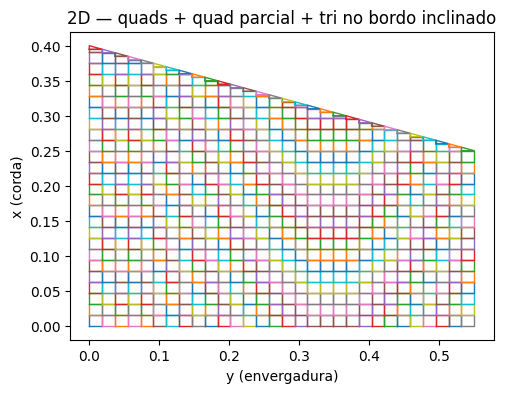

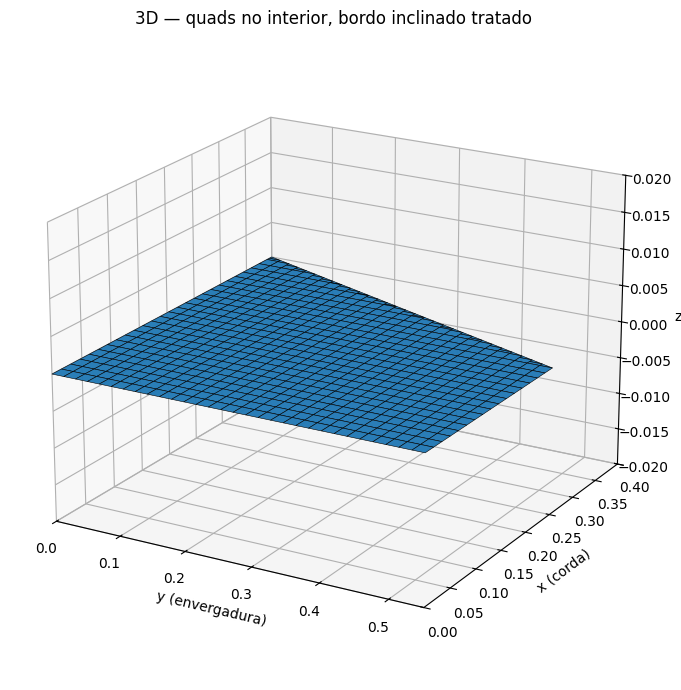

In [19]:
# ============================================================
# Célula 6 — Exemplo (ajuste para seus valores)
# ============================================================

b = .55
c_root = 0.40
c_tip  = 0.25

nx_tip = 16   # controla h = c_tip/nx_tip (compatível com corda da ponta)
ny = 30       # número de faixas no span

nodes, quads, tris, meta = generate_mesh_quads_plus_edge_split(
    b=b, c_root=c_root, c_tip=c_tip,
    nx_tip=nx_tip, ny=ny
)

print("h =", meta["h"])
print("quads:", len(quads), "tris:", len(tris))

plot_mesh_2d(nodes, quads, tris, title="2D — quads + quad parcial + tri no bordo inclinado")
plot_mesh_3d(nodes, quads, tris, title="3D — quads no interior, bordo inclinado tratado")


<div style="font-family: Arial, sans-serif; line-height: 1.5; max-width: 900px; margin: 0 auto;">

  <h2 style="margin-bottom: 0.2rem;">Justificativa da escolha da malha para a placa trapezoidal (simulação aeroelástica)</h2>
  <p style="margin-top: 0; color: #444;">
    A discretização adotada para a placa plana de geometria trapezoidal foi construída com uma malha predominantemente
    <strong>quadrilateral</strong>, complementada por <strong>elementos triangulares</strong> e/ou <strong>quadriláteros parciais</strong>
    na região da borda inclinada (Fig. 1 e 2).
  </p>

   </p>

  <!-- IMAGENS ADICIONADAS -->
  <div style="display: flex; gap: 20px; justify-content: center; margin: 20px 0; flex-wrap: wrap;">

<div style="text-align: center;">
<img src="images/mesh2d.png" 
      alt="Malha 2D trapezoidal - visão geral"
      style="max-width: 400px; width: 100%; border: 1px solid #ccc; border-radius: 6px;">
<p style="font-size: 0.9rem; color: #555; margin-top: 8px;">
  Figura 1 – Malha 2D predominante em quadriláteros.
</p>
</div>

<div style="text-align: center;">
<img src="images/mesh3d.png" 
      alt="Detalhe da borda inclinada com elementos de transição"
      style="max-width: 400px; width: 100%; border: 1px solid #ccc; border-radius: 6px;">
<p style="font-size: 0.9rem; color: #555; margin-top: 8px;">
  Figura 2 – Região da borda inclinada com elementos de transição.
</p>

</div>

  </div>

  <p>

  <h3>1. Motivação geométrica: adaptação ao formato trapezoidal</h3>
  <p>
    A placa analisada possui uma geometria não retangular (trapezoidal), equivalente a uma região “retangular” combinada com um
    “recorte” triangular na extremidade. Em malhas estruturadas puramente retangulares, essa inclinação gera incompatibilidades
    na fronteira e, frequentemente, elementos muito distorcidos se tentarmos forçar apenas quadriláteros.
  </p>
  <p>
    Por esse motivo, optou-se por uma malha <strong>majoritariamente composta por quadriláteros regulares</strong> no interior do domínio
    (onde é desejável máxima qualidade numérica), enquanto a <strong>borda inclinada</strong> foi resolvida com elementos “de transição”
    (triângulos e/ou quads parciais). Essa estratégia mantém a malha bem condicionada e reduz a distorção dos elementos.
  </p>

  <h3>2. Motivação numérica: qualidade para flexão e torção</h3>
  <p>
    O objetivo estrutural é avaliar <strong>deflexão (flexão)</strong> e <strong>torção</strong> sob carregamentos aerodinâmicos.
    Para esse tipo de resposta, a discretização deve representar corretamente:
  </p>
  <ul>
    <li><strong>curvaturas de flexão</strong> (deformação fora do plano);</li>
    <li><strong>rotações</strong> associadas ao comportamento torsional;</li>
    <li><strong>gradientes de deformação</strong> próximos a bordas e regiões de restrição.</li>
  </ul>
  <p>
    Em elementos de casca/placa, quadriláteros bem formados tendem a apresentar desempenho superior para campos de flexão e torção,
    especialmente quando as direções principais da malha acompanham direções naturais do problema (por exemplo, direções análogas
    à “corda” e à “envergadura”, conforme indicado na figura). Assim, a escolha por <strong>quads dominantes</strong> melhora a precisão
    e a estabilidade numérica da solução global.
  </p>

  <h3>3. Formulação de placa/casca e robustez (Mindlin–Reissner com anti-locking)</h3>
  <p>
    Para simulações aeroelásticas, uma escolha prática e robusta é empregar uma formulação de casca/placa baseada em
    <strong>Mindlin–Reissner</strong>, pois ela permite capturar não apenas flexão, mas também <strong>cisalhamento transversal</strong>
    quando a espessura não é desprezível (ou quando se busca robustez numérica em um intervalo amplo de espessuras).
  </p>
  <p>
    Contudo, elementos Mindlin clássicos podem sofrer de <strong>shear locking</strong> no caso de placas finas, tornando a estrutura
    artificialmente rígida e subestimando a deflexão. Para evitar esse efeito, é recomendável o uso de elementos com técnicas
    <strong>anti-locking</strong>, como a família <strong>MITC (Mixed Interpolation of Tensorial Components)</strong>, que trata a interpolação
    do cisalhamento de forma apropriada e melhora a confiabilidade tanto em regime de placa fina quanto moderadamente espessa.
  </p>
  <p>
    Dessa forma, a malha escolhida (quads predominantes, com triângulos apenas onde a geometria impõe transição) é coerente com
    o uso de elementos de casca Mindlin/MITC: preserva a qualidade dos elementos no interior, limita irregularidades a uma região
    pequena e mantém boa representação do comportamento torsional.
  </p>

  <h3>4. Estratégia de transição na borda inclinada</h3>
  <p>
    A presença de triângulos/quads parciais ao longo da borda inclinada, conforme a figura 2D acima, é uma estratégia de malha
    comum em geometrias trapezoidais. Ela evita a criação de quadriláteros excessivamente “esticados” ou com alto <em>skewness</em>,
    que poderiam degradar a precisão, especialmente na previsão de torção.
  </p>
  <p>
    O cuidado principal nessa região é manter boa qualidade geométrica (por exemplo, evitar triângulos muito agudos e elementos com
    jacobiano degradado). Com essa condição satisfeita, a influência dos elementos de transição tende a permanecer localizada e o
    comportamento global (deflexão e torção) é dominado pela região bem malhada do interior.
  </p>

  <h3>5. Validação por convergência de malha</h3>
  <p>
    Por fim, a adequação dessa malha deve ser confirmada com um estudo de <strong>convergência</strong>, refinando-se a discretização
    e comparando grandezas de interesse, como:
  </p>
  <ul>
    <li>deslocamento máximo fora do plano (<strong>deflexão</strong>);</li>
    <li>ângulo/medida de <strong>torção</strong> em seções representativas;</li>
    <li>frequências naturais (se o caso for dinâmico, relevante para flutter).</li>
  </ul>
  <p>
    Se essas respostas estabilizarem com o refinamento, isso indica que a malha escolhida é adequada para a simulação proposta,
    equilibrando <strong>custo computacional</strong> e <strong>fidelidade</strong> na representação de flexão e torção.
  </p>

<!-- BLOCO 4 IMAGENS 2x2 -->
<div style="margin: 30px 0; text-align: center;">

  <!-- Grid 2x2 -->
  <div style="
      display: grid;
      grid-template-columns: repeat(2, 1fr);
      gap: 20px;
      max-width: 900px;
      margin: 0 auto;
  ">

  <img src="images/f1_heatmap.png"
        alt="Imagem 1"
        style="width: 100%; border: 1px solid #ccc; border-radius: 6px;">

  <img src="images/f2_heatmap.png"
        alt="Imagem 2"
        style="width: 100%; border: 1px solid #ccc; border-radius: 6px;">

  <img src="images/f3_heatmap.png"
        alt="Imagem 3"
        style="width: 100%; border: 1px solid #ccc; border-radius: 6px;">

  <img src="images/f4_heatmap.png"
        alt="Imagem 4"
        style="width: 100%; border: 1px solid #ccc; border-radius: 6px;">

  </div>

  <!-- Legenda única -->
  <p style="font-size: 0.9rem; color: #555; margin-top: 12px;">
    Figura 3 – Heatmap de convergência das frequências naturais (modos 1 a 4) em função da discretização da malha nas direções X e Y.
  </p>

</div>

<!-- malhar escolhida -->
<div style="text-align: center;">
<img src="images/mesh2dFinal.png" 
      alt="Malha 2D trapezoidal - visão geral"
      style="max-width: 400px; width: 100%; border: 1px solid #ccc; border-radius: 6px;">
<p style="font-size: 0.9rem; color: #555; margin-top: 8px;">
  Figura 4 – Malha 2D escolhida nx_tip = 50 e ny = 150 .
</p>
</div>

<!-- BLOCO 5 IMAGENS 2x2 -->
<div style="margin: 30px 0; text-align: center;">

  <!-- Grid 2x2 -->
  <div style="
      display: grid;
      grid-template-columns: repeat(2, 1fr);
      gap: 20px;
      max-width: 900px;
      margin: 0 auto;
  ">

  <img src="imagens2/f1_heatmap.png"
        alt="Imagem 1"
        style="width: 100%; border: 1px solid #ccc; border-radius: 6px;">

  <img src="imagens2/f2_heatmap.png"
        alt="Imagem 2"
        style="width: 100%; border: 1px solid #ccc; border-radius: 6px;">

  <img src="imagens2/f3_heatmap.png"
        alt="Imagem 3"
        style="width: 100%; border: 1px solid #ccc; border-radius: 6px;">

  <img src="imagens2/f4_heatmap.png"
        alt="Imagem 4"
        style="width: 100%; border: 1px solid #ccc; border-radius: 6px;">

  </div>

  <!-- Legenda única -->
  <p style="font-size: 0.9rem; color: #555; margin-top: 12px;">
    Figura 3 – Heatmap de convergência das frequências naturais (modos 1 a 4) em função da discretização da malha nas direções X e Y.
  </p>

</div>

  <hr style="margin: 1.2rem 0;">

  <p style="font-size: 0.95rem; color: #444;">
    <strong>Referência visual:</strong> a figura 2D mostrada acima (malha “quads + quads parciais + tri na borda inclinada”) ilustra a
    estratégia de manter quadriláteros regulares no interior e usar elementos de transição apenas onde a borda inclinada exige.
  </p>

</div>

Validação pela frequências naturais 

<div style="font-family: Arial, sans-serif; line-height: 1.5; max-width: 1000px; margin: 0 auto;">

  <h3 style="margin-bottom: 0.4rem;">Modos encontrados</h3>
  <p style="margin-top: 0; color: #444;">
    A seguir são apresentadas as animações correspondentes aos quatro primeiros modos de vibração,
    acompanhadas da respectiva tendência modal.
  </p>

  <!-- MODO 1 -->
  <div style="margin: 30px 0;">
    <h4>Modo 1</h4>
    <div style="display: flex; gap: 20px; align-items: center; flex-wrap: wrap;">
      <img src="Modos/modo2d3d_1.gif"
           alt="Animação do Modo 1"
           style="width: 48%; border: 1px solid #ccc; border-radius: 8px;">
      <img src="images/TendenciaF1.png"
           alt="Tendência do Modo 1"
           style="width: 48%; border: 1px solid #ccc; border-radius: 8px;">
    </div>
  </div>

  <!-- MODO 2 -->
  <div style="margin: 30px 0;">
    <h4>Modo 2</h4>
    <div style="display: flex; gap: 20px; align-items: center; flex-wrap: wrap;">
      <img src="Modos/modo2d3d_2.gif"
           alt="Animação do Modo 2"
           style="width: 48%; border: 1px solid #ccc; border-radius: 8px;">
      <img src="images/TendenciaF2output.png"
           alt="Tendência do Modo 2"
           style="width: 48%; border: 1px solid #ccc; border-radius: 8px;">
    </div>
  </div>

  <!-- MODO 3 -->
  <div style="margin: 30px 0;">
    <h4>Modo 3</h4>
    <div style="display: flex; gap: 20px; align-items: center; flex-wrap: wrap;">
      <img src="Modos/modo2d3d_3.gif"
           alt="Animação do Modo 3"
           style="width: 48%; border: 1px solid #ccc; border-radius: 8px;">
      <img src="images/TendenciaF3.png"
           alt="Tendência do Modo 3"
           style="width: 48%; border: 1px solid #ccc; border-radius: 8px;">
    </div>
  </div>

  <!-- MODO 4 -->
  <div style="margin: 30px 0;">
    <h4>Modo 4</h4>
    <div style="display: flex; gap: 20px; align-items: center; flex-wrap: wrap;">
      <img src="Modos/modo2d3d_4.gif"
           alt="Animação do Modo 4"
           style="width: 48%; border: 1px solid #ccc; border-radius: 8px;">
      <img src="images/TendenciaF4.png"
           alt="Tendência do Modo 4"
           style="width: 48%; border: 1px solid #ccc; border-radius: 8px;">
    </div>
  </div>

</div>

In [56]:
# -*- coding: utf-8 -*-
"""
Gera 2 gráficos 3D (quadrilátero e triângulo) e marca o ponto de aplicação da força.
Salva as imagens como PNG no diretório atual.

Requisitos:
  pip install matplotlib numpy
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401  (necessário para 3D)


def plot_quadrilateral(out_path="painel_quadrilateral_ponto_forca.png"):
    # Quadrado no plano z=0 (corda na direção x)
    square = np.array([
        [0.0, 0.0, 0.0],
        [1.0, 0.0, 0.0],
        [1.0, 1.0, 0.0],
        [0.0, 1.0, 0.0],
        [0.0, 0.0, 0.0],
    ])

    # Ponto de aplicação: 25% da corda (x=0.25), meio da "envergadura" local (y=0.5)
    p = np.array([0.5, 0.75, 0.0])

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")

    # contorno
    ax.plot(square[:, 0], square[:, 1], square[:, 2], linewidth=2)

    # ponto
    ax.scatter([p[0]], [p[1]], [p[2]], s=60)
    ax.text(p[0], p[1], p[2] + 0.25, "Centro aerodinamico", fontsize=10)

    # seta indicando a força (para baixo no z)
    ax.quiver(
        p[0], p[1], p[2] + 0.25,   # origem um pouco acima
        0.0, 0.0, -0.25,           # direção (para baixo)
        arrow_length_ratio=0.25,
        linewidth=2
    )

    ax.set_title("Elemento quadrilateral e ponto de aplicação da força")
    ax.set_xlabel("y (envergadura/local)")
    ax.set_ylabel("x (corda)")
    ax.set_zlabel("z")

    ax.set_box_aspect((1, 1, 0.5))
    ax.view_init(elev=25, azim=-55)

    plt.tight_layout()
    plt.savefig(out_path, dpi=200)
    plt.close(fig)
    return out_path


def plot_triangle(out_path="painel_triangular_ponto_forca.png"):
    # Triângulo no plano z=0
    tri = np.array([
        [0.0, 0.0, 0.0],  # vértice A
        [1.0, 0.0, 0.0],  # vértice B (na direção da corda x)
        [0.0, 1.0, 0.0],  # vértice C
        [0.0, 0.0, 0.0],
    ])

    # Ponto de aplicação (como você descreveu):
    # x = (1/3)*0.75 = 0.25 (pela sua parametrização) e y = 1/3
    p = np.array([1.0/3.0, 0.75*2/3,  0.0])

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")

    # contorno
    ax.plot(tri[:, 0], tri[:, 1], tri[:, 2], linewidth=2)

    # ponto
    ax.scatter([p[0]], [p[1]], [p[2]], s=60)
    ax.text(p[0], p[1], p[2] + 0.25, "Centro aerodinamico", fontsize=10)

    # seta indicando a força (para baixo no z)
    ax.quiver(
        p[0], p[1], p[2] + 0.25,
        0.0, 0.0, -0.25,
        arrow_length_ratio=0.25,
        linewidth=2
    )

    ax.set_title("Elemento triangular e ponto de aplicação da força")
    ax.set_xlabel("y (envergadura/local)")
    ax.set_ylabel("x (corda)")
    ax.set_zlabel("z")

    ax.set_box_aspect((1, 1, 0.5))
    ax.view_init(elev=25, azim=-55)

    plt.tight_layout()
    plt.savefig(out_path, dpi=200)
    plt.close(fig)
    return out_path


if __name__ == "__main__":
    q_path = plot_quadrilateral()
    t_path = plot_triangle()
    print("Imagens salvas em:")
    print(" -", q_path)
    print(" -", t_path)

Imagens salvas em:
 - painel_quadrilateral_ponto_forca.png
 - painel_triangular_ponto_forca.png


DOFs totais: 2154 | DOFs fixos: 84 | DOFs livres: 2070
Nós na raiz (y=0): 28

Frequências naturais (Hz):
  modo 1: 21.7288 Hz
  modo 2: 113.3464 Hz
  modo 3: 150.7495 Hz
  modo 4: 290.5401 Hz
  modo 5: 388.1277 Hz
  modo 6: 527.6377 Hz


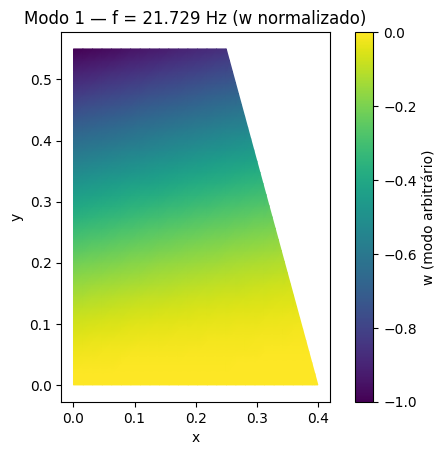

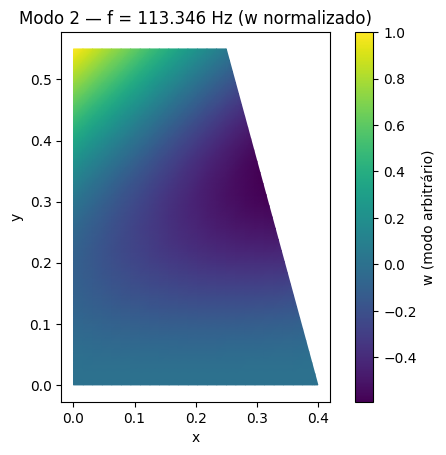

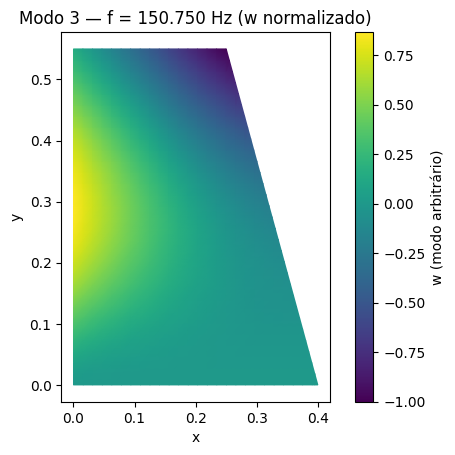

In [ ]:
# ============================================================
# Célula 7 — Matrizes de rigidez (K) e massa (M) + modos de vibrar
# (FEM de placa Mindlin-Reissner com triângulos lineares)
# ============================================================
import numpy as np
import matplotlib.pyplot as plt

from scipy.sparse import lil_matrix, csc_matrix
from scipy.sparse.linalg import eigsh

def quads_to_tris(quads):
    """Divide cada quad [n1,n2,n3,n4] em 2 triângulos (n1,n2,n3) e (n1,n3,n4)."""
    tris_from_quads = []
    for (n1,n2,n3,n4) in quads:
        tris_from_quads.append([n1,n2,n3])
        tris_from_quads.append([n1,n3,n4])
    return np.array(tris_from_quads, dtype=int)

def mindlin_tri3_element_matrices(xy, E, nu, h, rho, kappa=5/6):
    """
    Elemento TRI3 Mindlin com DOFs por nó: [w, tx, ty]
    Retorna Ke (9x9) e Me (9x9) (massa consistente).
    """
    x1,y1 = xy[0]
    x2,y2 = xy[1]
    x3,y3 = xy[2]

    # Área (duas vezes)
    detJ2 = (x2-x1)*(y3-y1) - (x3-x1)*(y2-y1)
    A = 0.5*detJ2
    if A <= 0:
        raise ValueError("Triângulo com área não-positiva (ordem dos nós incorreta?)")

    # Derivadas das funções de forma lineares (constantes no elemento)
    # N_i = (a_i + b_i x + c_i y) / (2A)
    b1, c1 = (y2 - y3), (x3 - x2)
    b2, c2 = (y3 - y1), (x1 - x3)
    b3, c3 = (y1 - y2), (x2 - x1)

    dNdx = np.array([b1, b2, b3], dtype=float) / (2*A)
    dNdy = np.array([c1, c2, c3], dtype=float) / (2*A)

    # ---------- Bending ----------
    D = E*h**3/(12*(1-nu**2))
    Db = D*np.array([[1,   nu, 0],
                     [nu,  1,  0],
                     [0,   0, (1-nu)/2]], dtype=float)

    Bb = np.zeros((3, 9), dtype=float)
    for i in range(3):
        wi  = 3*i
        txi = 3*i + 1
        tyi = 3*i + 2
        # kx = dtx/dx
        Bb[0, txi] = dNdx[i]
        # ky = dty/dy
        Bb[1, tyi] = dNdy[i]
        # kxy = dtx/dy + dty/dx
        Bb[2, txi] = dNdy[i]
        Bb[2, tyi] = dNdx[i]

    Kb = (Bb.T @ Db @ Bb) * A

    # ---------- Shear (1 ponto no centróide para reduzir locking) ----------
    G = E/(2*(1+nu))
    Ds = (kappa*G*h) * np.eye(2)

    Bs = np.zeros((2, 9), dtype=float)
    Ncent = 1/3  # N1=N2=N3 no centróide
    for i in range(3):
        wi  = 3*i
        txi = 3*i + 1
        tyi = 3*i + 2

        # gx = tx + dw/dx
        Bs[0, wi]  = dNdx[i]
        Bs[0, txi] = Ncent

        # gy = ty + dw/dy
        Bs[1, wi]  = dNdy[i]
        Bs[1, tyi] = Ncent

    Ks = (Bs.T @ Ds @ Bs) * A

    Ke = Kb + Ks

    # ---------- Massa consistente ----------
    # Matriz consistente para triângulo linear: (A/12)*[[2,1,1],[1,2,1],[1,1,2]]
    Mtri = (A/12) * np.array([[2,1,1],[1,2,1],[1,1,2]], dtype=float)

    Me = np.zeros((9, 9), dtype=float)

    # massa translacional (w)
    mw = rho*h
    for i in range(3):
        for j in range(3):
            Me[3*i, 3*j] = mw * Mtri[i, j]

    # inércia rotacional (tx, ty)
    mr = rho*(h**3)/12
    for i in range(3):
        for j in range(3):
            Me[3*i+1, 3*j+1] = mr * Mtri[i, j]
            Me[3*i+2, 3*j+2] = mr * Mtri[i, j]

    return Ke, Me

def assemble_KM_mindlin(nodes, tris, E, nu, h, rho, kappa=5/6):
    """
    Monta K e M globais (sparse) para placa Mindlin TRI3.
    """
    n_nodes = nodes.shape[0]
    ndof = 3*n_nodes
    K = lil_matrix((ndof, ndof), dtype=float)
    M = lil_matrix((ndof, ndof), dtype=float)

    for tri in tris:
        xy = nodes[np.array(tri), :2]
        Ke, Me = mindlin_tri3_element_matrices(xy, E=E, nu=nu, h=h, rho=rho, kappa=kappa)

        dofs = []
        for nid in tri:
            dofs.extend([3*nid, 3*nid+1, 3*nid+2])
        dofs = np.array(dofs, dtype=int)

        for a in range(9):
            ia = dofs[a]
            for b in range(9):
                ib = dofs[b]
                K[ia, ib] += Ke[a, b]
                M[ia, ib] += Me[a, b]

    return K.tocsc(), M.tocsc()

def apply_clamped_root_bc(nodes, K, M, y_root=0.0, tol=1e-12):
    """
    Engaste na raiz: y == y_root => w=tx=ty=0.
    Retorna Kff, Mff e o mapeamento de DOFs livres.
    """
    y = nodes[:,1]
    root_nodes = np.where(np.isclose(y, y_root, atol=tol))[0]
    fixed = []
    for nid in root_nodes:
        fixed.extend([3*nid, 3*nid+1, 3*nid+2])
    fixed = np.array(sorted(set(fixed)), dtype=int)

    ndof = K.shape[0]
    all_dofs = np.arange(ndof, dtype=int)
    free = np.setdiff1d(all_dofs, fixed)

    Kff = K[free][:, free]
    Mff = M[free][:, free]
    return Kff, Mff, free, fixed, root_nodes

def solve_modes(Kff, Mff, n_modes=6, sigma=0.0):
    """
    Resolve K φ = ω² M φ com eigsh (menores ω).
    Retorna (omega, modes) ordenados.
    """
    # shift-invert ajuda a pegar os menores autovalores com mais robustez
    vals, vecs = eigsh(Kff, k=n_modes, M=Mff, sigma=sigma, which='LM')
    vals = np.real(vals)
    vecs = np.real(vecs)

    # ω² = λ
    idx = np.argsort(vals)
    vals = vals[idx]
    vecs = vecs[:, idx]

    omega = np.sqrt(np.clip(vals, 0, None))
    return omega, vecs

def plot_mode_w(nodes, tris, mode_w, title):
    """Plota o deslocamento transversal w em uma malha triangular."""
    import matplotlib.tri as mtri
    tri_obj = mtri.Triangulation(nodes[:,0], nodes[:,1], tris)
    plt.figure()
    plt.tripcolor(tri_obj, mode_w, shading='gouraud')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.colorbar(label='w (modo arbitrário)')
    plt.title(title)
    plt.xlabel('x'); plt.ylabel('y')
    plt.show()

# -----------------------------
# Parâmetros do material / placa
# -----------------------------
E = 70e9         # Pa  (ex.: alumínio ~70 GPa)
nu = 0.33        # -
rho = 2700       # kg/m³
h_plate = 0.005  # m (5 mm)

# -----------------------------
# Malha: converter quads -> tris e juntar com tris do topo
# -----------------------------
tris_all = np.vstack([tris, quads_to_tris(quads)])

# Montagem
K, M = assemble_KM_mindlin(nodes, tris_all, E=E, nu=nu, h=h_plate, rho=rho)

# Condição de contorno (engaste na raiz y=0)
Kff, Mff, free, fixed, root_nodes = apply_clamped_root_bc(nodes, K, M, y_root=0.0, tol=1e-10)

print(f"DOFs totais: {K.shape[0]} | DOFs fixos: {len(fixed)} | DOFs livres: {len(free)}")
print(f"Nós na raiz (y=0): {len(root_nodes)}")

# Resolver modos
n_modes = 4
omega, vecs = solve_modes(Kff, Mff, n_modes=n_modes, sigma=0.0)
freq_hz = omega/(2*np.pi)

print("\nFrequências naturais (Hz):")
for i,f in enumerate(freq_hz, start=1):
    print(f"  modo {i}: {f:.4f} Hz")

# Reconstruir e plotar os 3 primeiros modos (w)
for m in range(min(3, n_modes)):
    full = np.zeros(K.shape[0])
    full[free] = vecs[:, m]
    w = full[0::3]  # pega apenas w de cada nó
    # normalizar para visualização
    w = w / (np.max(np.abs(w)) + 1e-12)
    plot_mode_w(nodes, tris_all, w, title=f"Modo {m+1} — f = {freq_hz[m]:.3f} Hz (w normalizado)")

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.tri import Triangulation
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable

def save_mode_gif_2d3d(nodes, tris, w, filename,
                       freq_hz=None, amp=0.1, n_frames=60, fps=24,
                       elev=25, azim=-60):
    """
    Animação lado a lado:
      - esquerda: 2D (tripcolor)
      - direita: 3D (trisurf)
    Mesma escala e colormap em ambos.
    Cores baseadas em |z| (verde em 0, vermelho escuro no máximo).
    """

    # --- malha ---
    x = nodes[:, 0]
    y = nodes[:, 1]
    tris = np.asarray(tris, dtype=int)
    tri = Triangulation(x, y, tris)

    # --- modo normalizado ---
    w = np.asarray(w, dtype=float)
    w = w / (np.max(np.abs(w)) + 1e-12)

    # z(t) = amp*sin(phase)*w  => |z| no máximo = amp
    norm = Normalize(vmin=0.0, vmax=amp)
    cmap = LinearSegmentedColormap.from_list("green_to_darkred", ["#00aa00", "#7a0000"])

    # --- figura com 2 subplots ---
    fig = plt.figure(figsize=(12, 5.5))
    ax2d = fig.add_subplot(1, 2, 1)
    ax3d = fig.add_subplot(1, 2, 2, projection="3d")

    # títulos/labels
    title = "Modo (2D + 3D)"
    if freq_hz is not None:
        title += f" — f = {freq_hz:.3f} Hz"
    fig.suptitle(title)

    ax2d.set_xlabel("x")
    ax2d.set_ylabel("y")
    ax2d.set_aspect("equal", adjustable="box")

    ax3d.set_xlabel("x")
    ax3d.set_ylabel("y")
    ax3d.set_zlabel("w (visual)")
    ax3d.view_init(elev=elev, azim=azim)
    ax3d.set_zlim(-amp, amp)

    # --- colorbar única (compatível nos dois) ---
    sm = ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=[ax2d, ax3d], shrink=0.75, pad=0.02)
    cbar.set_label("|w| (deformação visual)")

    # -------- frame inicial --------
    phase0 = 0.0
    z0 = amp * np.sin(phase0) * w

    # cores por TRIÂNGULO (face): média de |z| nos 3 nós
    c0_tri = np.abs(z0)[tris].mean(axis=1)

    # 2D: tripcolor com facecolors
    col2d = ax2d.tripcolor(tri, facecolors=c0_tri, shading="flat",
                           cmap=cmap, norm=norm)
    ax2d.set_title("2D (cores por |w|)")

    # 3D: trisurf com o mesmo array de cores
    surf3d = ax3d.plot_trisurf(tri, z0, linewidth=0.2, antialiased=True,
                               cmap=cmap, norm=norm, shade=False)
    surf3d.set_array(c0_tri)
    surf3d.set_clim(0.0, amp)
    ax3d.set_title("3D (superfície)")

    # -------- update --------
    def update(frame):
        nonlocal surf3d

        phase = 2 * np.pi * frame / (n_frames - 1)
        z = amp * np.sin(phase) * w
        c_tri = np.abs(z)[tris].mean(axis=1)

        # Atualiza 2D (muito leve)
        col2d.set_array(c_tri)

        # Atualiza 3D (mais robusto recriar)
        surf3d.remove()
        surf3d = ax3d.plot_trisurf(tri, z, linewidth=0.2, antialiased=True,
                                   cmap=cmap, norm=norm, shade=False)
        surf3d.set_array(c_tri)
        surf3d.set_clim(0.0, amp)

        return (col2d, surf3d)

    ani = animation.FuncAnimation(fig, update, frames=n_frames,
                                  interval=1000 / fps, blit=False)

    ani.save(filename, writer=animation.PillowWriter(fps=fps))
    plt.close(fig)
    print(f"GIF 2D+3D salvo em: {filename}")

In [25]:
n_gifs = min(10, n_modes)
for m in range(n_gifs):
    full = np.zeros(K.shape[0])
    full[free] = vecs[:, m]
    w = full[0::3]
    save_mode_gif_2d3d(nodes, tris_all, w,
                       filename=f"./Modos/modo2d3d_{m+1}.gif",
                       freq_hz=freq_hz[m],
                       amp=0.1, n_frames=60, fps=24)

GIF 2D+3D salvo em: ./Modos/modo2d3d_1.gif
GIF 2D+3D salvo em: ./Modos/modo2d3d_2.gif
GIF 2D+3D salvo em: ./Modos/modo2d3d_3.gif
GIF 2D+3D salvo em: ./Modos/modo2d3d_4.gif
GIF 2D+3D salvo em: ./Modos/modo2d3d_5.gif
GIF 2D+3D salvo em: ./Modos/modo2d3d_6.gif


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def run_case(nx_tip, ny):
    nodes, quads, tris, meta = generate_mesh_quads_plus_edge_split(
        b=b, c_root=c_root, c_tip=c_tip,
        nx_tip=nx_tip, ny=ny
    )

    tris_all = np.vstack([tris, quads_to_tris(quads)])

    K, M = assemble_KM_mindlin(nodes, tris_all, E=E, nu=nu, h=h_plate, rho=rho)
    Kff, Mff, free, fixed, root_nodes = apply_clamped_root_bc(nodes, K, M, y_root=0.0, tol=1e-10)

    omega, vecs = solve_modes(Kff, Mff, n_modes=6, sigma=0.0)
    freq_hz = omega / (2*np.pi)

    # Métricas de malha (ajuste como achar melhor)
    hx = c_tip / nx_tip
    hy = b / ny
    hmax = max(hx, hy)

    return {
        "nx_tip": nx_tip,
        "ny": ny,
        "hx": hx,
        "hy": hy,
        "hmax": hmax,
        "ndofs_free": len(free),
        "nelems_tris": len(tris_all),
        "f1": freq_hz[0],
        "f2": freq_hz[1],
        "f3": freq_hz[2],
        "f4": freq_hz[3],
    }

# Sugestão de malhas para varrer
nx_list = [10,20,40,90,100,120,140]
ny_list = [90,100,120,140,150, 200]

rows = []
for nx in nx_list:
    for ny in ny_list:
        out = run_case(nx, ny)
        rows.append(out)
        print(f"nx={nx:>2}, ny={ny:>2} | DOFs={out['ndofs_free']:>6} | f1..f4={out['f1']:.2f}, {out['f2']:.2f}, {out['f3']:.2f}, {out['f4']:.2f}")

df = pd.DataFrame(rows)

nx=10, ny=90 | DOFs=  4146 | f1..f4=16.43, 92.55, 154.55, 250.71
nx=10, ny=100 | DOFs=  4629 | f1..f4=16.36, 92.28, 154.02, 250.15
nx=10, ny=120 | DOFs=  5541 | f1..f4=16.31, 92.08, 153.35, 249.88
nx=10, ny=140 | DOFs=  6489 | f1..f4=16.26, 91.94, 152.91, 249.57
nx=10, ny=150 | DOFs=  6936 | f1..f4=16.26, 91.93, 152.77, 249.68
nx=10, ny=200 | DOFs=  9279 | f1..f4=16.23, 91.85, 152.26, 249.58
nx=20, ny=90 | DOFs=  7647 | f1..f4=16.61, 89.46, 105.40, 239.07
nx=20, ny=100 | DOFs=  8511 | f1..f4=16.49, 89.12, 104.13, 238.63
nx=20, ny=120 | DOFs= 10185 | f1..f4=16.34, 88.86, 102.39, 238.61
nx=20, ny=140 | DOFs= 11931 | f1..f4=16.25, 88.74, 101.26, 238.71
nx=20, ny=150 | DOFs= 12777 | f1..f4=16.23, 88.75, 100.84, 238.92
nx=20, ny=200 | DOFs= 17061 | f1..f4=16.15, 88.87, 99.49, 239.84
nx=40, ny=90 | DOFs= 14649 | f1..f4=16.80, 79.03, 97.80, 217.16
nx=40, ny=100 | DOFs= 16293 | f1..f4=16.63, 77.86, 96.56, 214.65
nx=40, ny=120 | DOFs= 19473 | f1..f4=16.41, 76.34, 94.95, 211.53
nx=40, ny=140 | D

In [33]:
import numpy as np
import pandas as pd

FREQ_COLS = ["f1","f2","f3","f4"]

def rel_change(a, b):
    """mudança relativa |b-a|/|b| (evita divisão por zero)"""
    denom = max(abs(b), 1e-12)
    return abs(b - a) / denom

def max_rel_change(freqs_old, freqs_new, cols=FREQ_COLS):
    """retorna o maior erro relativo entre modos"""
    return max(rel_change(freqs_old[c], freqs_new[c]) for c in cols)

def pick_next_step(last, prev, nx_mult=1.25, ny_mult=1.25, min_step=1):
    """
    Decide se refina nx ou ny com base no 'efeito' observado.
    prev = ponto anterior, last = ponto atual (mais refinado)
    """
    # sensibilidade aproximada (mudança por incremento)
    dnx = max(last["nx_tip"] - prev["nx_tip"], 1e-12)
    dny = max(last["ny"]     - prev["ny"],     1e-12)

    # mede quanto mudou no caminho prev -> last
    delta_modes = np.array([abs(last[c] - prev[c]) for c in FREQ_COLS])
    delta = float(delta_modes.max())

    # "mudança por passo"
    sens_nx = delta / dnx
    sens_ny = delta / dny

    nx_new, ny_new = last["nx_tip"], last["ny"]

    if sens_nx >= sens_ny:
        nx_new = int(np.ceil(last["nx_tip"] * nx_mult))
        nx_new = max(nx_new, last["nx_tip"] + min_step)
    else:
        ny_new = int(np.ceil(last["ny"] * ny_mult))
        ny_new = max(ny_new, last["ny"] + min_step)

    return nx_new, ny_new

In [34]:
def adaptive_convergence(
    run_case,
    nx0=10, ny0=10,
    nx1=20, ny1=20,
    tol=0.01,          # 1% de erro relativo máximo nos modos f1..f4
    max_iter=12,
    nx_mult=1.25,
    ny_mult=1.25
):
    rows = []
    cache = {}  # evita recomputar caso repetido

    def run(nx, ny):
        key = (int(nx), int(ny))
        if key in cache:
            return cache[key]
        out = run_case(int(nx), int(ny))
        cache[key] = out
        rows.append(out)
        print(f"nx={out['nx_tip']:>4}, ny={out['ny']:>4} | DOFs={out['ndofs_free']:>7} | "
              f"f1..f4={out['f1']:.3f}, {out['f2']:.3f}, {out['f3']:.3f}, {out['f4']:.3f}")
        return out

    # 2 pontos iniciais
    prev = run(nx0, ny0)
    last = run(nx1, ny1)

    err = max_rel_change(prev, last)
    print(f"Erro relativo máx (f1..f4) entre os 2 últimos = {err*100:.2f}%")

    it = 0
    while err > tol and it < max_iter:
        nx_new, ny_new = pick_next_step(last, prev, nx_mult=nx_mult, ny_mult=ny_mult)

        prev = last
        last = run(nx_new, ny_new)

        err = max_rel_change(prev, last)
        print(f"Erro relativo máx (f1..f4) entre os 2 últimos = {err*100:.2f}%")
        it += 1

    df = pd.DataFrame(rows).sort_values(["nx_tip","ny"]).reset_index(drop=True)

    result = {
        "converged": err <= tol,
        "final_err": err,
        "final_nx": last["nx_tip"],
        "final_ny": last["ny"],
        "final_freqs": {c: last[c] for c in FREQ_COLS},
        "df": df
    }
    return result

In [36]:
res = adaptive_convergence(
    run_case,
    nx0=10, ny0=10,
    nx1=20, ny1=20,
    tol=0.001,      # 1%
    max_iter=12,
    nx_mult=1.25,
    ny_mult=1.25
)

df = res["df"]
print(res["converged"], res["final_nx"], res["final_ny"], res["final_err"])
print(res["final_freqs"])

nx=  10, ny=  10 | DOFs=    444 | f1..f4=50.603, 251.622, 342.318, 541.780
nx=  20, ny=  20 | DOFs=   1671 | f1..f4=29.635, 151.105, 189.503, 363.937
Erro relativo máx (f1..f4) entre os 2 últimos = 80.64%
nx=  25, ny=  20 | DOFs=   2052 | f1..f4=30.290, 155.043, 188.292, 372.767
Erro relativo máx (f1..f4) entre os 2 últimos = 2.54%
nx=  25, ny=  25 | DOFs=   2577 | f1..f4=25.737, 131.187, 160.789, 326.620
Erro relativo máx (f1..f4) entre os 2 últimos = 18.18%
nx=  32, ny=  25 | DOFs=   3270 | f1..f4=26.189, 133.590, 159.608, 333.593
Erro relativo máx (f1..f4) entre os 2 últimos = 2.09%
nx=  32, ny=  32 | DOFs=   4170 | f1..f4=22.559, 113.918, 137.167, 292.788
Erro relativo máx (f1..f4) entre os 2 últimos = 17.27%
nx=  40, ny=  32 | DOFs=   5157 | f1..f4=22.823, 114.861, 136.471, 296.847
Erro relativo máx (f1..f4) entre os 2 últimos = 1.37%
nx=  40, ny=  40 | DOFs=   6465 | f1..f4=20.493, 101.497, 121.915, 267.478
Erro relativo máx (f1..f4) entre os 2 últimos = 13.17%
nx=  50, ny=  40 |

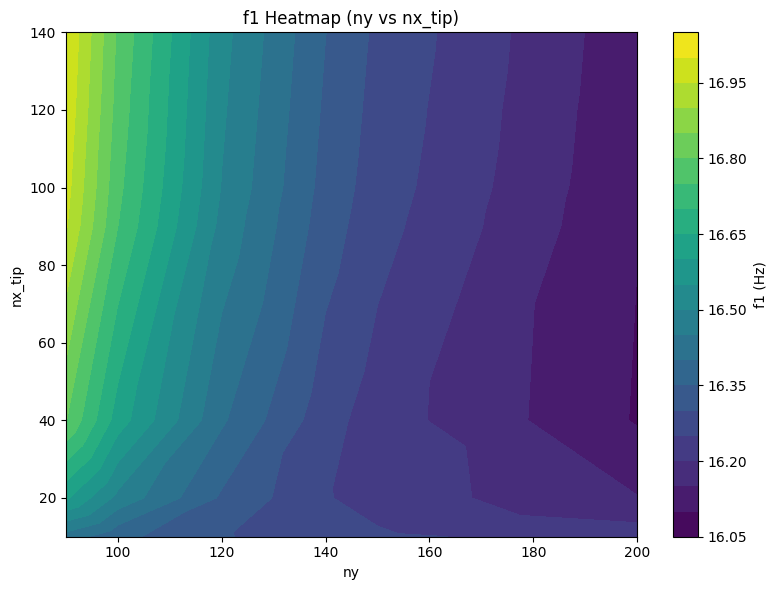

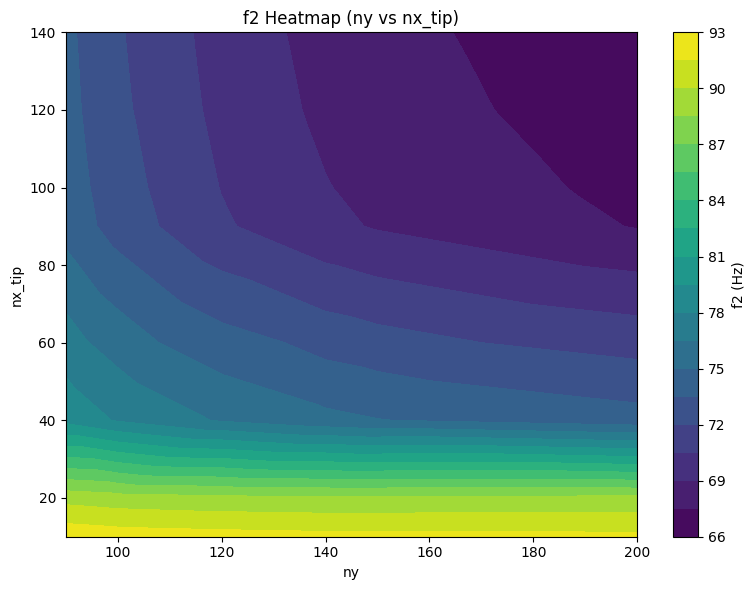

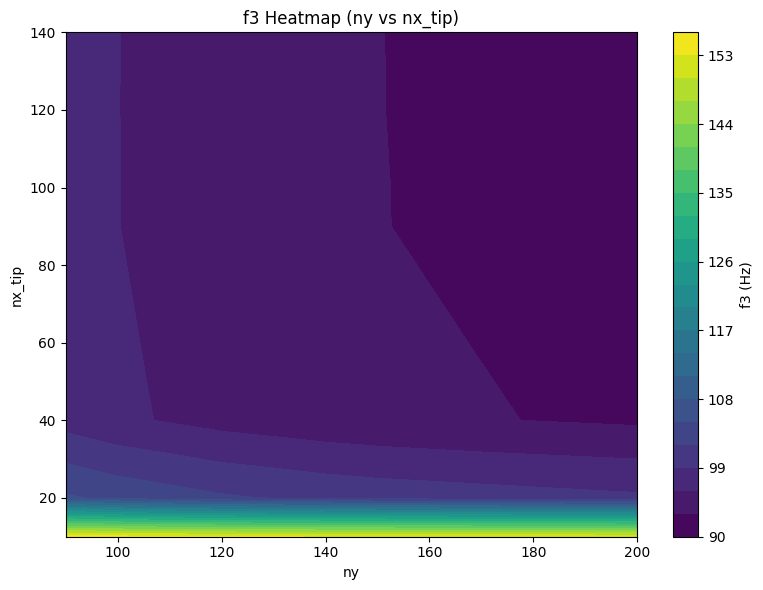

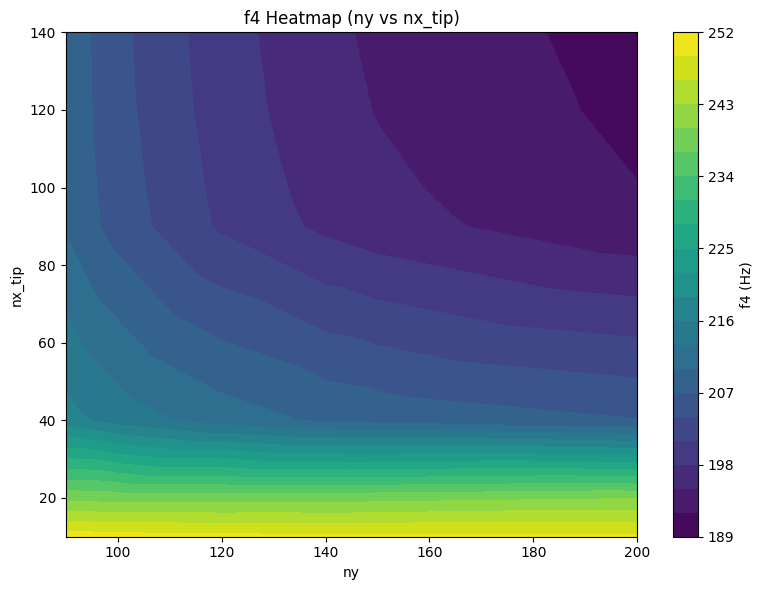

In [44]:
import matplotlib.pyplot as plt

freq_cols = ["f1", "f2", "f3", "f4"]

for fcol in freq_cols:
    plt.figure(figsize=(8,6))
    
    x = df["ny"].values
    y = df["nx_tip"].values
    z = df[fcol].values
    
    # Heatmap triangulado (funciona mesmo se a malha não for regular)
    contour = plt.tricontourf(x, y, z, levels=20)
    
    plt.xlabel("ny")
    plt.ylabel("nx_tip")
    plt.title(f"{fcol} Heatmap (ny vs nx_tip)")
    
    plt.colorbar(contour, label=f"{fcol} (Hz)")
    
    plt.tight_layout()
    plt.show()

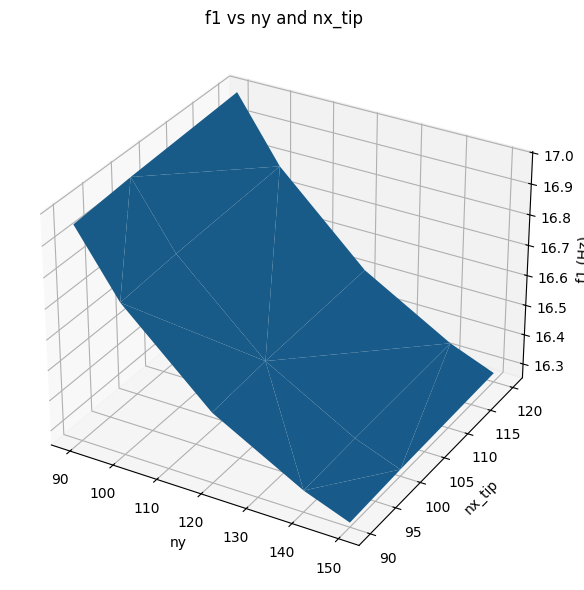

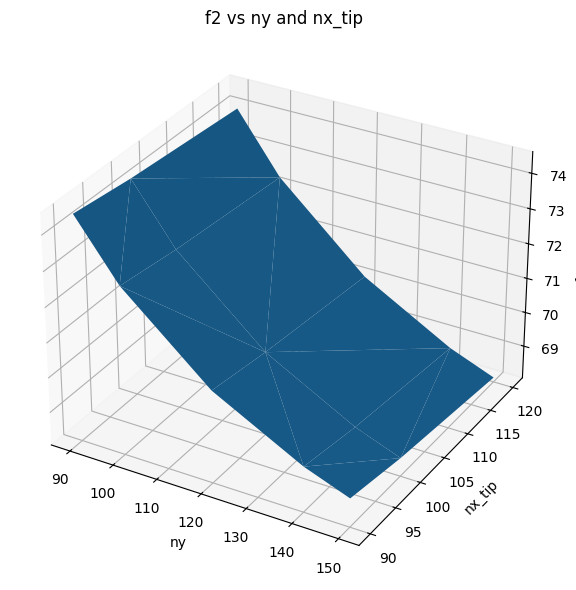

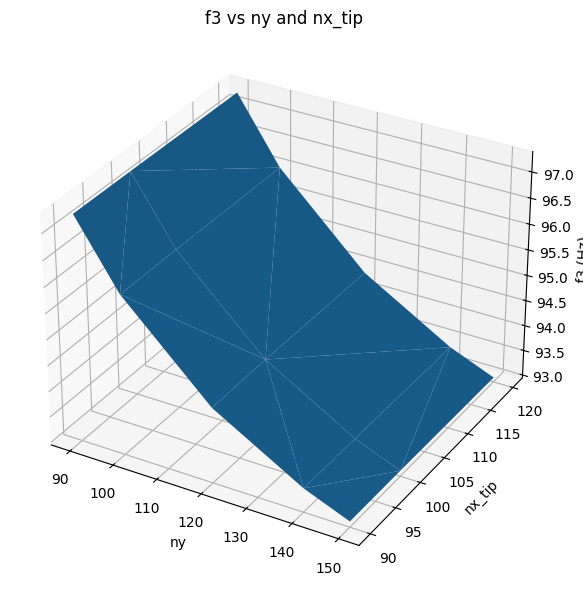

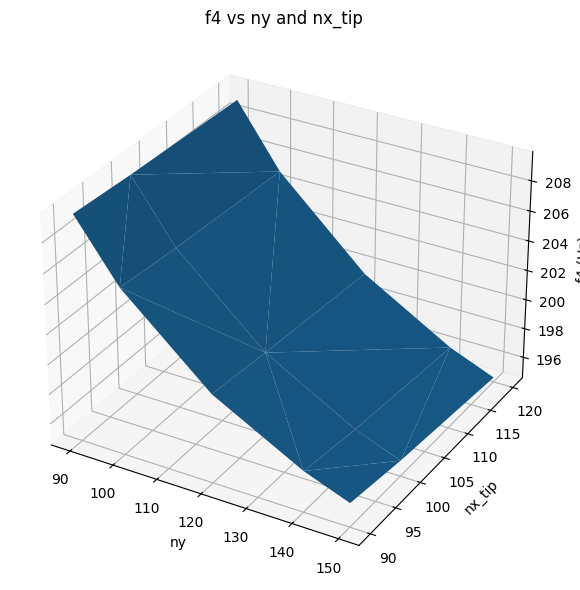

In [41]:
freq_cols = ["f1", "f2", "f3", "f4"]

for fcol in freq_cols:
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    
    # 🔁 Invertendo nx e ny
    x = df["ny"].values
    y = df["nx_tip"].values
    z = df[fcol].values
    
    ax.plot_trisurf(x, y, z)
    
    ax.set_xlabel("ny")
    ax.set_ylabel("nx_tip")
    ax.set_zlabel(f"{fcol} (Hz)")
    ax.set_title(f"{fcol} vs ny and nx_tip")
    
    plt.tight_layout()
    plt.show()

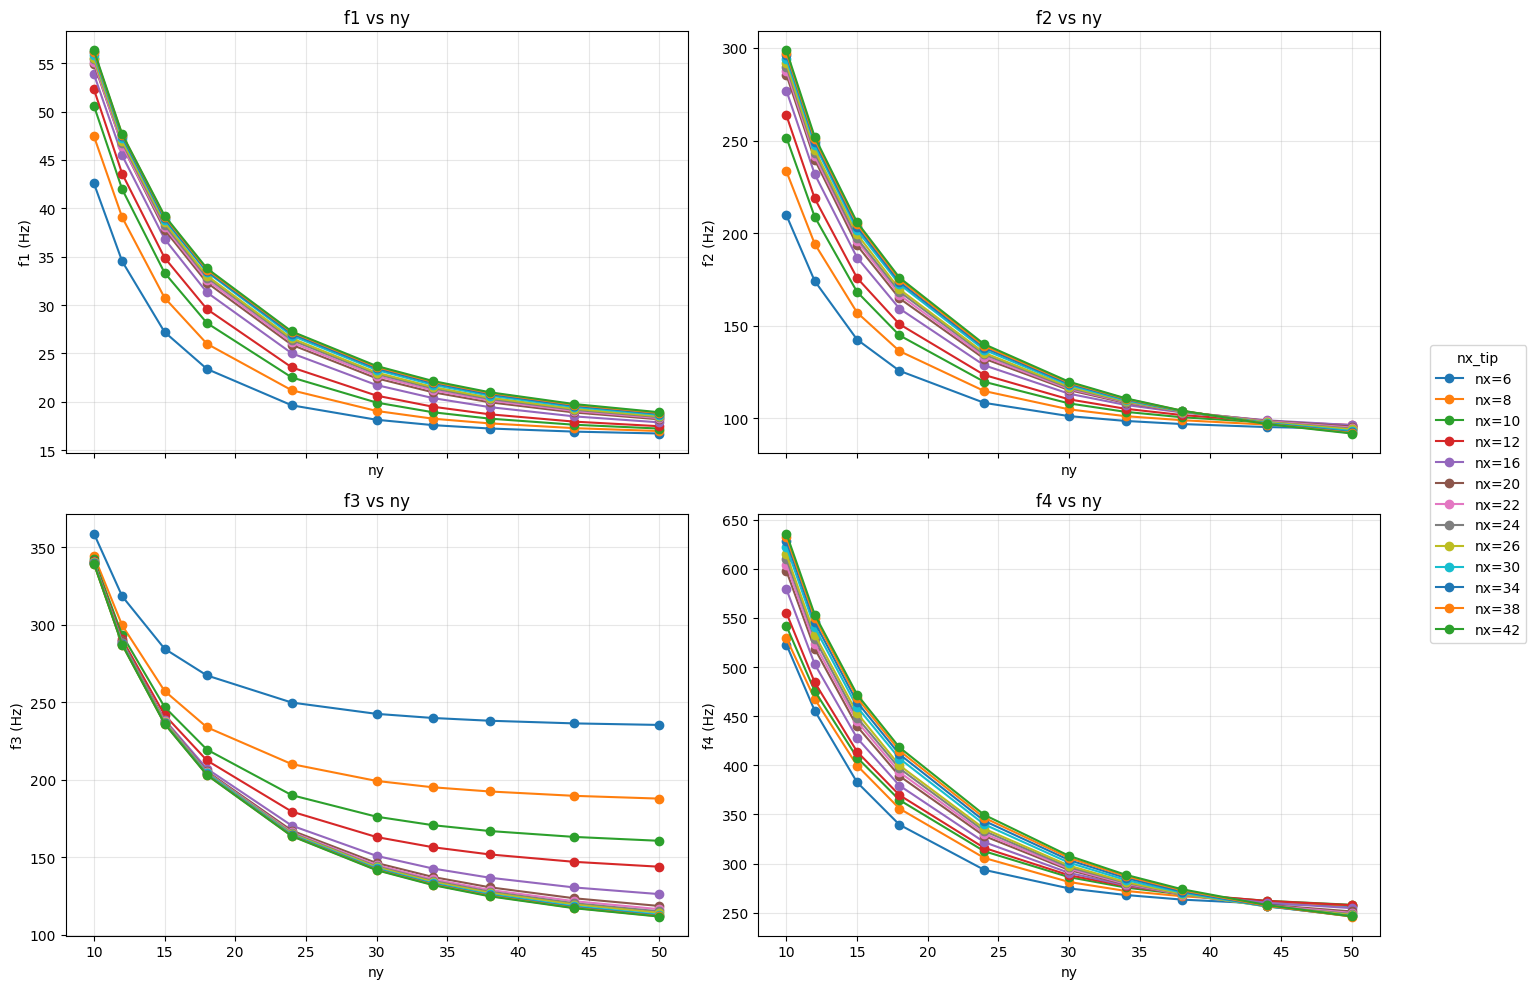

In [31]:
import matplotlib.pyplot as plt

freq_cols = ["f1", "f2", "f3", "f4"]

# garante ordem consistente
nx_vals = sorted(df["nx_tip"].unique())
ny_vals = sorted(df["ny"].unique())

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
axes = axes.ravel()

for ax, fcol in zip(axes, freq_cols):
    for nx in nx_vals:
        sub = df[df["nx_tip"] == nx].sort_values("ny")
        ax.plot(sub["ny"], sub[fcol], marker="o", linewidth=1.5, label=f"nx={nx}")
    ax.set_title(f"{fcol} vs ny")
    ax.set_xlabel("ny")
    ax.set_ylabel(f"{fcol} (Hz)")
    ax.grid(True, alpha=0.3)

# legenda única (fora) pra não poluir os gráficos
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="center left", bbox_to_anchor=(1.02, 0.5), title="nx_tip")

plt.tight_layout()
plt.show()

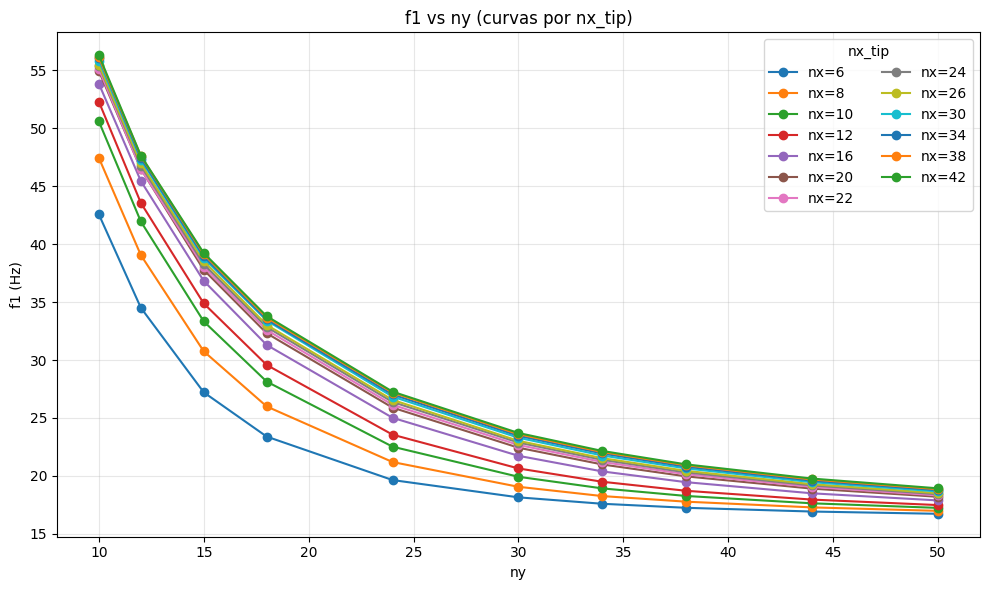

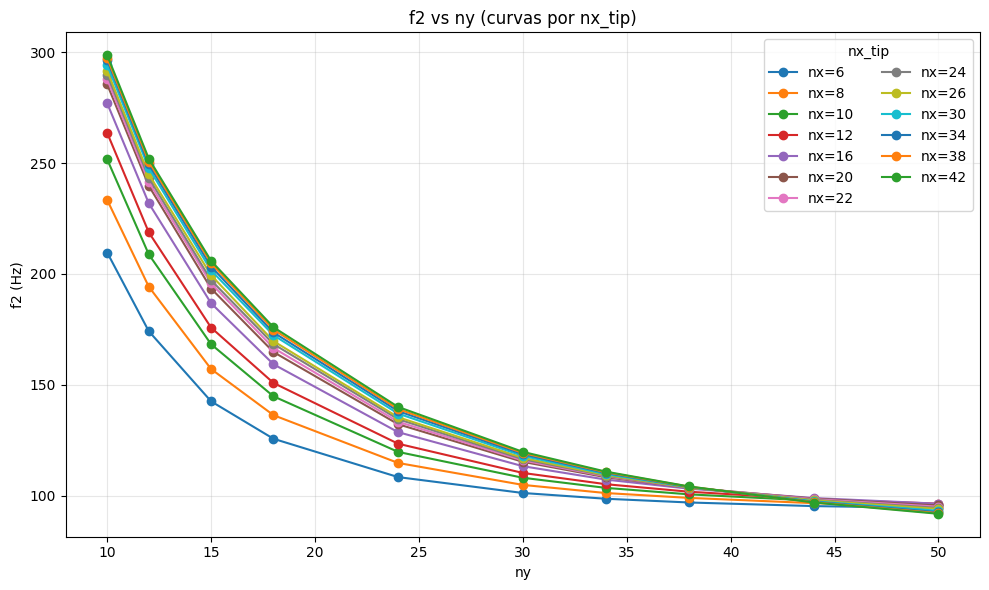

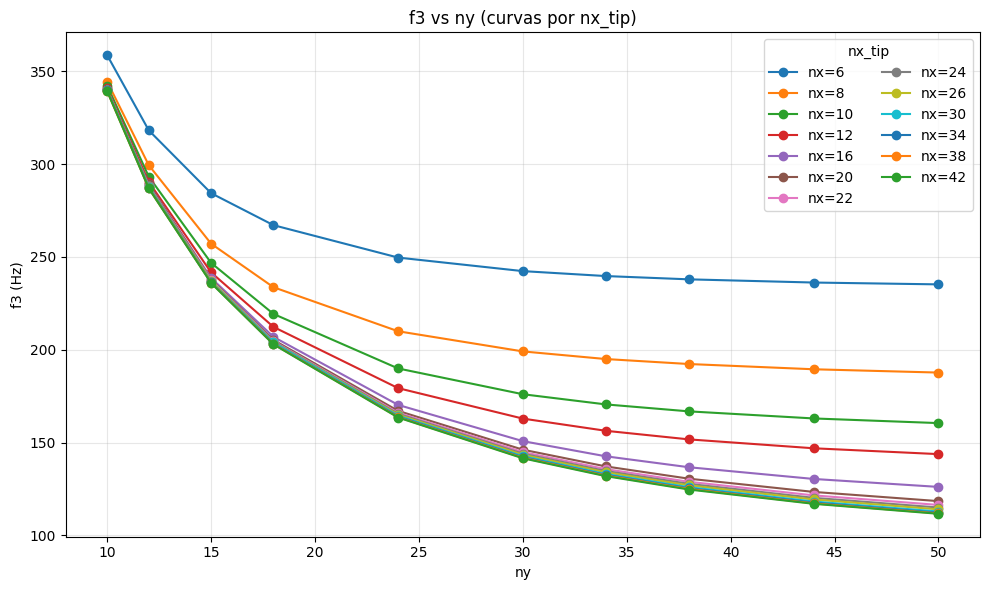

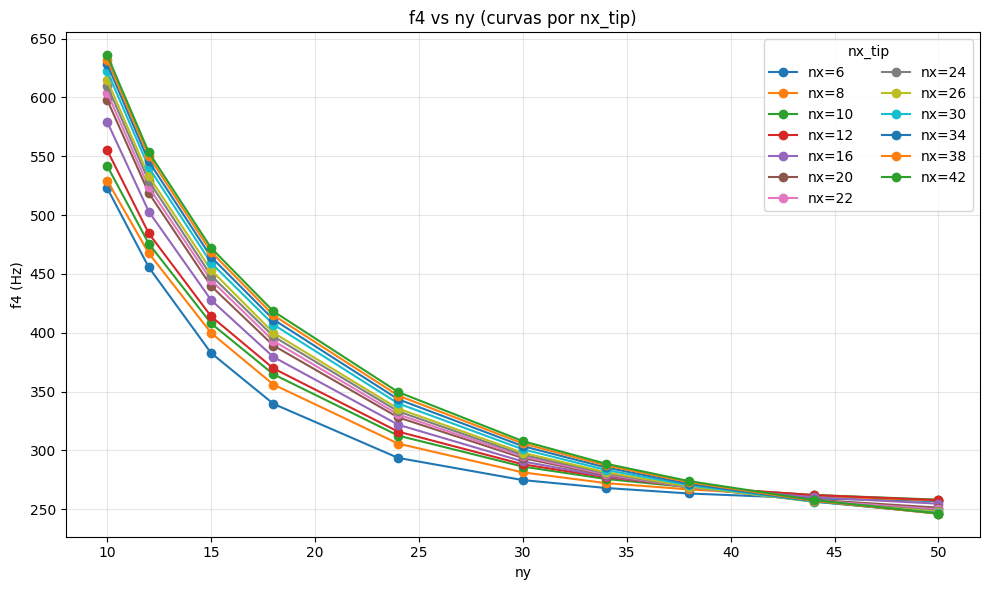

In [32]:
import matplotlib.pyplot as plt

freq_cols = ["f1", "f2", "f3", "f4"]
nx_vals = sorted(df["nx_tip"].unique())

for fcol in freq_cols:
    plt.figure(figsize=(10, 6))
    for nx in nx_vals:
        sub = df[df["nx_tip"] == nx].sort_values("ny")
        plt.plot(sub["ny"], sub[fcol], marker="o", linewidth=1.5, label=f"nx={nx}")
    plt.xlabel("ny")
    plt.ylabel(f"{fcol} (Hz)")
    plt.title(f"{fcol} vs ny (curvas por nx_tip)")
    plt.grid(True, alpha=0.3)
    plt.legend(title="nx_tip", ncol=2)
    plt.tight_layout()
    plt.show()

In [15]:
# referência = linha com menor hmax (mais refinada)
ref = df.loc[df["hmax"].idxmin()]
for i in range(1, 5):
    df[f"err_f{i}_pct"] = 100.0 * np.abs(df[f"f{i}"] - ref[f"f{i}"]) / ref[f"f{i}"]

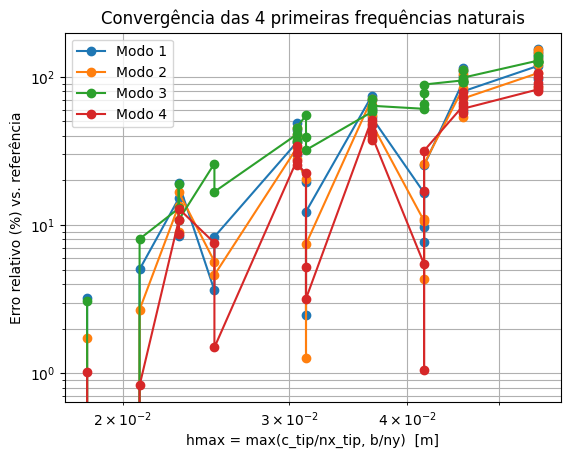

In [16]:
df_plot = df.sort_values("hmax")

plt.figure()
for i in range(1, 5):
    plt.plot(df_plot["hmax"], df_plot[f"err_f{i}_pct"], marker="o", label=f"Modo {i}")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("hmax = max(c_tip/nx_tip, b/ny)  [m]")
plt.ylabel("Erro relativo (%) vs. referência")
plt.grid(True, which="both")
plt.legend()
plt.title("Convergência das 4 primeiras frequências naturais")
plt.show()

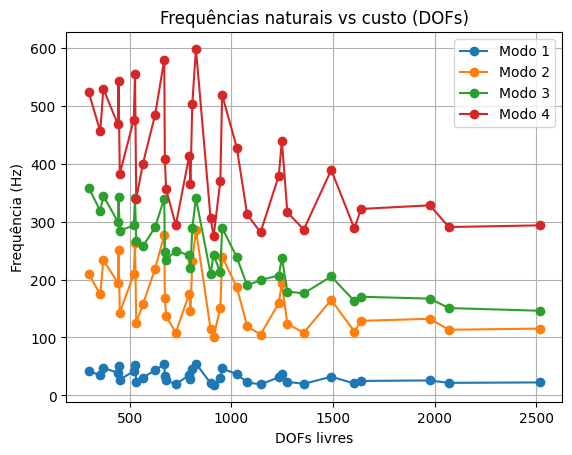

In [17]:
df_plot = df.sort_values("ndofs_free")

plt.figure()
for i in range(1, 5):
    plt.plot(df_plot["ndofs_free"], df_plot[f"f{i}"], marker="o", label=f"Modo {i}")

plt.xlabel("DOFs livres")
plt.ylabel("Frequência (Hz)")
plt.grid(True)
plt.legend()
plt.title("Frequências naturais vs custo (DOFs)")
plt.show()

In [18]:
# critério: erro < 1% nos 4 primeiros modos
tol = 0.000005  # %

df_ok = df[
    (df["err_f1_pct"] < tol) &
    (df["err_f2_pct"] < tol) &
    (df["err_f3_pct"] < tol) &
    (df["err_f4_pct"] < tol)
]

# escolher a mais barata (menor DOF)
chosen = df_ok.sort_values("ndofs_free").iloc[0]

print("Discretização escolhida:")
print(f"nx_tip = {chosen['nx_tip']}")
print(f"ny     = {chosen['ny']}")
print(f"DOFs livres = {chosen['ndofs_free']}")
print(f"hmax = {chosen['hmax']:.5f} m")

Discretização escolhida:
nx_tip = 16.0
ny     = 30.0
DOFs livres = 2070.0
hmax = 0.01833 m



<div id="cap3" style="padding: 6px 2px; margin-top: 10px;">
<h2 style="margin:0 0 6px 0; font-size: 18px;">Capítulo 3 — Modelo aerodinâmico</h2>
<ul style="margin:0; padding-left: 18px; font-size: 14px;">
<li>Implementar um modelo aerodinâmico compatível com a placa (pressões/forças distribuídas).</li>
<li>Definir parâmetros e hipóteses do escoamento (regime, linearizações, etc.).</li>
<li>Gerar as cargas aerodinâmicas em função do estado estrutural (deslocamentos/velocidades, conforme o modelo).</li>
</ul>
</div>


<div style="font-family: Arial, sans-serif; line-height: 1.55; max-width: 900px; margin: 0 auto; color:#222;">

  <h2 style="margin-bottom: 0.2rem;">
    Justificativa do modelo aerodinâmico e ponto de aplicação das forças
  </h2>

  <p style="margin-top: 0; color: #444;">
    O acoplamento aeroelástico requer um modelo aerodinâmico simples, robusto e coerente com a discretização estrutural.
    Neste trabalho, cada elemento da malha (quadrilateral ou triangular) é interpretado como um “painel” que representa uma
    pequena porção de asa. A força aerodinâmica resultante associada a esse painel é inicialmente aplicada em um ponto de
    referência aerodinâmica (centro aerodinâmico) e, em seguida, distribuída aos nós do elemento.
  </p>

  <h3>1. Hipótese física: cada elemento como um painel de asa</h3>
  <p>
    A superfície trapezoidal é discretizada em elementos que podem ser retangulares (quadriláteros) ou triangulares
    (elementos de transição na borda inclinada). Para fins aerodinâmicos, considera-se que cada elemento descreve uma
    região local de “asa plana” com uma direção de corda bem definida. Assim, o carregamento aerodinâmico calculado para o
    elemento é tratado como uma resultante equivalente aplicada em um ponto representativo do painel.
  </p>

  <h3>2. Ponto de aplicação: 25% da corda (centro aerodinâmico)</h3>
  <p>
    Em modelos aerodinâmicos de baixa ordem, é comum representar a resultante aerodinâmica atuando no
    <strong>centro aerodinâmico</strong>, tipicamente localizado a <strong>25% da corda</strong> a partir do bordo de ataque.
    Adota-se, portanto, a aplicação da força no ponto de abscissa local
    <strong>x = 0,25&nbsp;c</strong>, onde <em>c</em> é a corda aerodinâmica do elemento.
  </p>

  <div style="background:#fafafa; border:1px solid #e6e6e6; border-radius:10px; padding:12px 14px; margin: 12px 0;">
    <p style="margin:0; color:#333;">
      <strong>Elemento quadrilateral (retangular):</strong><br>
      A força aerodinâmica equivalente do painel é aplicada no ponto a <strong>25% da corda</strong> (centro aerodinâmico),
      medido na direção local da corda do elemento.
    </p>
  </div>

  <!-- <div style="text-align: center;"> -->
<img src="images/painel_quadrilateral_ponto_forca.png" 
      alt="Detalhe da borda inclinada com elementos de transição"
      style="max-width: 400px; width: 100%; border: 1px solid #ccc; border-radius: 6px;">
<p style="font-size: 0.9rem; color: #555; margin-top: 8px;">
  Figura 6  – Aplicação da força nos elementos retangulares .
</p>




  <h3>3. Caso triangular: equivalência geométrica e posição ao longo da corda</h3>
  <p>
    Para elementos triangulares, a ideia é manter a mesma filosofia: aplicar a resultante em um ponto representativo do
    carregamento do painel. Como o triângulo é uma transição geométrica (por exemplo, devido à borda inclinada), usa-se uma
    posição equivalente ao longo da corda do elemento, associada a uma “corda média” do triângulo.
  </p>

  <p>
    Na prática, considera-se o ponto de aplicação ao longo da direção de corda do triângulo como estando a
    <strong>1/3 da corda local</strong>. De forma consistente com a parametrização utilizada (onde aparece o fator <strong>0,75</strong>
    devido à formatação/definição geométrica adotada), a coordenada longitudinal do ponto pode ser escrita como:
  </p>



  <div style="background:#fafafa; border:1px solid #e6e6e6; border-radius:10px; padding:12px 14px; margin: 12px 0;">
    <p style="margin:0; color:#333;">
      <strong>Elemento triangular:</strong><br>
      Ponto de aplicação ao longo da corda:
      <span style="white-space:nowrap;"><strong>x = (1/3)&nbsp;c</strong></span>
      e, na parametrização adotada,
      <span style="white-space:nowrap;"><strong>x = (1/3)&nbsp;·&nbsp;0,75</strong></span>
      (onde <strong>0,75</strong> decorre da forma como a coordenada/corda é definida no modelo).
    </p>
  </div>
<img src="images/painel_triangular_ponto_forca.png" 
      alt="Detalhe da borda inclinada com elementos de transição"
      style="max-width: 400px; width: 100%; border: 1px solid #ccc; border-radius: 6px;">
<p style="font-size: 0.9rem; color: #555; margin-top: 8px;">
  Figura 7 – Aplicação da força nos elementos Triangular .
</p>
  <p style="color:#444;">
    Essa escolha preserva a interpretação física do carregamento atuando em um ponto “equivalente” do painel, evitando
    concentrar a força em regiões extremas do triângulo e mantendo estabilidade numérica no acoplamento com o modelo estrutural.
  </p>

  <h3>4. Transferência das forças: da resultante aerodinâmica para os nós do elemento</h3>
  <p>
    Após determinar a resultante aerodinâmica do elemento e o seu ponto de aplicação (centro aerodinâmico do painel),
    essa força é <strong>distribuída</strong> para os nós do elemento. Essa distribuição é feita de maneira consistente com a
    interpolação do elemento (por exemplo, via funções de forma), garantindo que:
  </p>
  <ul>
    <li>a soma das forças nodais reproduza a <strong>força resultante</strong> do painel;</li>
    <li>o efeito de <strong>momento</strong> associado ao ponto de aplicação seja preservado de forma equivalente;</li>
    <li>o carregamento seja aplicado de modo suave e compatível com a discretização estrutural.</li>
  </ul>

  <h3>5. Vantagens da abordagem</h3>
  <p>
    Essa modelagem é particularmente adequada para estudos aeroelásticos preliminares, pois:
  </p>
  <ul>
    <li>é simples e robusta para malhas mistas (quadriláteros + triângulos);</li>
    <li>mantém uma interpretação física clara (cada elemento como painel de asa);</li>
    <li>permite consistência no acoplamento, aplicando a força em um ponto aerodinamicamente representativo e distribuindo-a aos nós.</li>
  </ul>

</div>


<div id="cap4" style="padding: 6px 2px; margin-top: 10px;">
<h2 style="margin:0 0 6px 0; font-size: 18px;">Capítulo 4 — Acoplamento aeroelástico (aero + MEF)</h2>
<ul style="margin:0; padding-left: 18px; font-size: 14px;">
<li>Implementar a troca de informações entre malha estrutural e aerodinâmica (mapeamento/interpolação, se necessário).</li>
<li>Construir o sistema aeroelástico acoplado e definir o problema a ser resolvido (estático/dinâmico; domínio do tempo/frequência).</li>
<li>Executar simulações e identificar métricas de interesse (ex.: resposta dinâmica, estabilidade, etc.).</li>
</ul>
</div>



<div id="cap5" style="padding: 6px 2px; margin-top: 10px;">
<h2 style="margin:0 0 6px 0; font-size: 18px;">Capítulo 5 — Verificação e atualização do MEF (ensaios em laboratório)</h2>
<ul style="margin:0; padding-left: 18px; font-size: 14px;">
<li>Planejar/organizar os testes experimentais de laboratório para validação estrutural.</li>
<li>Comparar previsões do MEF com medições (ex.: frequências naturais, modos, rigidez equivalente, etc.).</li>
<li>Ajustar parâmetros do modelo estrutural conforme necessário (atualização do MEF) e documentar o impacto.</li>
</ul>
</div>



<div id="cap6" style="padding: 6px 2px; margin-top: 10px;">
<h2 style="margin:0 0 6px 0; font-size: 18px;">Capítulo 6 — Verificação e atualização do modelo aerodinâmico (túnel de vento)</h2>
<ul style="margin:0; padding-left: 18px; font-size: 14px;">
<li>Planejar/organizar a campanha de túnel de vento para validação aerodinâmica.</li>
<li>Comparar forças/pressões previstas com medições experimentais.</li>
<li>Atualizar o modelo aerodinâmico (parâmetros/hipóteses) e registrar ganhos de aderência.</li>
</ul>
</div>



<div id="cap7" style="padding: 6px 2px; margin-top: 10px;">
<h2 style="margin:0 0 6px 0; font-size: 18px;">Capítulo 7 — Resultados finais, conclusões e próximos passos</h2>
<ul style="margin:0; padding-left: 18px; font-size: 14px;">
<li>Apresentar resultados finais (antes/depois das atualizações) e discutir limitações.</li>
<li>Consolidar um conjunto de recomendações para melhorias futuras.</li>
<li>Garantir reprodutibilidade: parâmetros, versões, hipóteses e células principais do notebook.</li>
</ul>
</div>



<!-- Footer -->
<div style="margin-top:16px; font-size: 12.5px; color:#6b7280;">
<hr style="border:none; border-top:1px solid #e5e7eb; margin: 14px 0;" />

</div>

</div>